# PyCalcolAr
### Inizializzazione

In [142]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.set_option('display.max_columns', None)

# Variabile utilizzata nel calcolo, DA MODIFICARE MANUALMENTE DALL'UTENTE  
delay = 246

### Importazione files
### > file Triplo36 (file di calibrazione dell'aria)

In [143]:
# definire il percorso del file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
file_path = "../test_data/doppio2013_2015.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0' \
               ,'40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1', '40F/36IC0', 'err 40F/36IC0', 'Run', 'Path']

# definire le colonne che contengono dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0' \
                 ,'40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1', '40F/36IC0', 'err 40F/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0' \
                                   ,'40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1', '40F/36IC0', 'err 40F/36IC0'\
                                   , 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con il numero del run 
run_number = airpipette_data['Path'].str.split('.').str[0]
run_number = run_number.str.split('_').str[-1]
run_number.name= 'Run_Number'
run_number = pd.to_numeric(run_number)

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, run_number, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)


# conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)
airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
airpipette_data.loc[:,'40F'] = airpipette_data.loc[:,'40F'].values / 62415000
airpipette_data.loc[:,'err 40F'] = airpipette_data.loc[:,'err 40F'].values / 62415000

display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,40F/36F,err 40F/36F,gain IC0/IC1,err gain IC0/IC1,40F/36IC0,err 40F/36IC0,Path
0,Sample Name,2507,2015-01-08 12:20:00,0.257137,0.000115,0.000159,3.524794e-07,0.000509,5.928062e-06,0.000833,1.201634e-06,505.563,6.00,1.63839,0.0190,0.311977,0.00370,Raw data stored in - C:\Nu Noble\Results\Data...
1,pip tripla 1 di 3,2508,2015-01-08 13:20:00,0.314620,0.000152,0.000192,4.005447e-07,0.000949,1.121525e-06,0.001040,1.153569e-06,331.589,0.42,1.09569,0.0018,0.202327,0.00049,Raw data stored in - C:\Nu Noble\Results\Data...
2,pip tripla 2 di 3,2509,2015-01-08 13:28:00,0.288831,0.000112,0.000177,4.646319e-07,0.000883,1.201634e-06,0.000951,1.009373e-06,327.153,0.46,1.07774,0.0019,0.200245,0.00059,Raw data stored in - C:\Nu Noble\Results\Data...
3,pip tripla 3 di 3,2510,2015-01-08 13:36:00,0.265274,0.000106,0.000163,3.685012e-07,0.000808,8.811984e-07,0.000873,9.452856e-07,328.221,0.38,1.08044,0.0017,0.201864,0.00051,Raw data stored in - C:\Nu Noble\Results\Data...
4,pipetta tripla 1 di 6,2511,2015-01-08 15:47:00,0.327154,0.000224,0.000196,7.690459e-07,0.000950,3.685012e-06,0.001066,1.762397e-06,344.430,1.30,1.12225,0.0047,0.206784,0.00110,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,same gas delta Z -73,2749,2015-04-01 15:30:00,0.783680,0.000176,0.000443,4.005447e-07,0.002262,2.403268e-06,0.002358,9.292638e-07,346.456,0.38,1.04256,0.0012,0.195904,0.00027,Raw data stored in - C:\Nu Noble\Results\Data...
132,Sample Name,2750,2015-04-08 11:37:00,0.092444,0.000027,0.000048,2.243051e-07,0.000196,9.132420e-07,0.000260,4.806537e-07,472.336,2.20,1.33059,0.0067,0.245919,0.00160,Raw data stored in - C:\Nu Noble\Results\Data...
133,Sample Name,2751,2015-04-08 12:10:00,0.317236,0.000059,0.000173,2.563486e-07,0.000809,8.972202e-07,0.000930,6.088280e-07,392.253,0.44,1.15047,0.0015,0.214018,0.00040,Raw data stored in - C:\Nu Noble\Results\Data...
134,Sample Name,2752,2015-04-08 14:20:00,0.336764,0.000058,0.000190,2.723704e-07,0.000878,1.041416e-06,0.001021,6.729152e-07,383.595,0.46,1.16246,0.0016,0.216436,0.00041,Raw data stored in - C:\Nu Noble\Results\Data...


In [144]:
# definire il percorso del file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
#file_path = "../test_data/doppio2013_2014.txt"

# definire la lista con gli indici delle colonne 
#columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
#               'gain IC0/IC1', 'err gain IC0/IC1', '40F/36F', 'err 40F/36F', 'Run', 'Path']

# definire le colonne che contengono dati numerici (ad eccezione delle colonne 'Run' e 'Path')
#columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
 #                'gain IC0/IC1', 'err gain IC0/IC1', '40F/36F', 'err 40F/36F', '40F']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
#airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
##airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
#for i in columns_numeric:
    #airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
#airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
#                                  '36F', 'err 36F', '40F/36F', 'err 40F/36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
#print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
#run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
#run_name = run_split.str[0]
#run_name = run_name.replace(["'"], [""], regex=True)
#run_name.name = 'Run_Name'

# formattare la colonna con il numero del run 
#run_number = airpipette_data['Path'].str.split('.').str[0]
#run_number = run_number.str.split('_').str[-1]
#run_number.name= 'Run_Number'
#run_number = pd.to_numeric(run_number)

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
#dataora = run_split.str[1]
#dataora.name = 'Date_Time'
#dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe airpipette_data
#airpipette_data = pd.concat([run_name, run_number, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
#airpipette_data.drop('Run',axis=1, inplace=True)


# conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)
#airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
#airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
#airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
#airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
#airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
#airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
#airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
#airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000

#display(airpipette_data)

### > file Run4 e Run22 (file di misura)

In [145]:
# definire la lista con gli indici delle colonne 
column_names_run3 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                     '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', \
                     'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40/36', \
                     'err40/36', 'Run', 'Path']
column_names_run2 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                     '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1', 'Run', 'Path']

# definire il percorso dei file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
file_path_3 = "../test_data/run3_senza indici.txt"
file_path_2 = "../test_data/run2_senza indici.txt"

# importare i file run
df_data_3 = pd.read_csv(file_path_3, header = None, index_col= False, names = column_names_run3, \
                        sep = '\t|,', engine = 'python')
df_data_2 = pd.read_csv(file_path_2, header = None, index_col= False, names = column_names_run2, \
                         sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_3 = df_data_3.replace(["{", "}"], ["", ""], regex=True)
df_data_2 = df_data_2.replace(["{", "}"], ["", ""], regex=True)

# definire le colonne che contengono dati numerici
colnames_numeric_3 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                      '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', \
                      'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40/36', \
                      'err40/36']   
colnames_numeric_2 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                     '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_3:
    df_data_3[i] = pd.to_numeric(df_data_3[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_2:
    df_data_2[i] = pd.to_numeric(df_data_2[i])

df_data = pd.concat([df_data_3, df_data_2], axis=0)

display(df_data)

,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Run,Path
0,0.213,0.00011,0.000146,3.300000e-07,0.000681,5.600000e-07,-0.000186,0.000095,0.000027,1.800000e-07,-5.490000e-08,5.300000e-09,0.000019,1.000000e-07,0.000014,1.000000e-07,-0.1030,0.053,0.533,0.0052,313.0,0.30,'Sample Name' run on 24 April 2013 at 12:40,Raw data stored in - C:\Nu Noble\Results\Data...
1,1.230,0.00790,0.000826,6.200000e-06,0.004240,2.700000e-05,0.000224,0.000089,0.000040,5.000000e-07,-9.370000e-08,9.500000e-09,0.000192,1.300000e-06,0.000015,1.600000e-07,0.8600,0.340,0.375,0.0062,290.0,2.60,'Sample Name' run on 24 April 2013 at 12:57,Raw data stored in - C:\Nu Noble\Results\Data...
2,0.495,0.00360,0.000360,2.700000e-06,0.001700,1.100000e-05,0.000554,0.000083,0.000041,3.000000e-07,-1.100000e-07,1.200000e-08,0.000617,6.400000e-06,0.000017,1.300000e-07,1.1100,0.170,0.412,0.0043,291.0,2.90,'Sample Name' run on 24 April 2013 at 13:29,Raw data stored in - C:\Nu Noble\Results\Data...
3,0.315,0.00270,0.000294,2.700000e-06,0.001010,8.000000e-06,0.003680,0.000079,0.000048,2.900000e-07,-3.260000e-08,7.900000e-09,0.004150,3.600000e-05,0.000022,1.200000e-07,1.1300,0.026,0.454,0.0038,311.0,3.60,'Sample Name' run on 24 April 2013 at 13:47,Raw data stored in - C:\Nu Noble\Results\Data...
4,1.060,0.00075,0.000710,1.000000e-06,0.003440,2.900000e-06,0.000171,0.000049,0.000030,5.700000e-07,-6.430000e-08,6.400000e-09,0.000017,2.100000e-07,0.000013,8.500000e-08,0.0979,0.028,0.433,0.0087,309.0,0.34,'MMhb-alfa stp1' run on 14 May 2013 at 14:44,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.318,0.00024,0.000999,1.300000e-06,0.000915,2.300000e-06,0.030300,0.000033,0.000006,1.000000e-07,1.500000e-05,1.600000e-07,NaN,NaN,NaN,NaN,NaN,NaN,347.000,0.9200,NaN,NaN,'alunite L1 st2' run on 26 November 2014 at 16:42,Raw data stored in - C:\Nu Noble\Results\Data...
148,0.242,0.00017,0.000698,9.800000e-07,0.000703,1.700000e-06,0.020500,0.000029,0.000006,1.000000e-07,1.530000e-05,1.400000e-07,NaN,NaN,NaN,NaN,NaN,NaN,345.000,0.8600,NaN,NaN,'alunite l1 stp3' run on 26 November 2014 at 1...,Raw data stored in - C:\Nu Noble\Results\Data...
149,0.375,0.00012,0.000577,4.200000e-07,0.000364,4.000000e-07,0.027600,0.000017,0.000013,5.400000e-08,1.260000e-05,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,1030.000,1.2000,NaN,NaN,'FZ53B1-2 STEP7' run on 14 January 2015 at 13:14,Raw data stored in - C:\Nu Noble\Results\Data...
150,0.548,0.00018,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,1.140000e-05,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.000,8.6000,NaN,NaN,'TVN4 STP2' run on 25 February 2015 at 13:31,Raw data stored in - C:\Nu Noble\Results\Data...


In [146]:
# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Path
0,Sample Name,2013-04-24 12:40:00,0.213,0.00011,0.000146,3.300000e-07,0.000681,5.600000e-07,-0.000186,0.000095,0.000027,1.800000e-07,-5.490000e-08,5.300000e-09,0.000019,1.000000e-07,0.000014,1.000000e-07,-0.1030,0.053,0.533,0.0052,313.0,0.30,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2013-04-24 12:57:00,1.230,0.00790,0.000826,6.200000e-06,0.004240,2.700000e-05,0.000224,0.000089,0.000040,5.000000e-07,-9.370000e-08,9.500000e-09,0.000192,1.300000e-06,0.000015,1.600000e-07,0.8600,0.340,0.375,0.0062,290.0,2.60,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2013-04-24 13:29:00,0.495,0.00360,0.000360,2.700000e-06,0.001700,1.100000e-05,0.000554,0.000083,0.000041,3.000000e-07,-1.100000e-07,1.200000e-08,0.000617,6.400000e-06,0.000017,1.300000e-07,1.1100,0.170,0.412,0.0043,291.0,2.90,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2013-04-24 13:47:00,0.315,0.00270,0.000294,2.700000e-06,0.001010,8.000000e-06,0.003680,0.000079,0.000048,2.900000e-07,-3.260000e-08,7.900000e-09,0.004150,3.600000e-05,0.000022,1.200000e-07,1.1300,0.026,0.454,0.0038,311.0,3.60,Raw data stored in - C:\Nu Noble\Results\Data...
4,MMhb-alfa stp1,2013-05-14 14:44:00,1.060,0.00075,0.000710,1.000000e-06,0.003440,2.900000e-06,0.000171,0.000049,0.000030,5.700000e-07,-6.430000e-08,6.400000e-09,0.000017,2.100000e-07,0.000013,8.500000e-08,0.0979,0.028,0.433,0.0087,309.0,0.34,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,alunite L1 st2,2014-11-26 16:42:00,0.318,0.00024,0.000999,1.300000e-06,0.000915,2.300000e-06,0.030300,0.000033,0.000006,1.000000e-07,1.500000e-05,1.600000e-07,NaN,NaN,NaN,NaN,NaN,NaN,347.000,0.9200,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
148,alunite l1 stp3,2014-11-26 17:12:00,0.242,0.00017,0.000698,9.800000e-07,0.000703,1.700000e-06,0.020500,0.000029,0.000006,1.000000e-07,1.530000e-05,1.400000e-07,NaN,NaN,NaN,NaN,NaN,NaN,345.000,0.8600,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
149,FZ53B1-2 STEP7,2015-01-14 13:14:00,0.375,0.00012,0.000577,4.200000e-07,0.000364,4.000000e-07,0.027600,0.000017,0.000013,5.400000e-08,1.260000e-05,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,1030.000,1.2000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
150,TVN4 STP2,2015-02-25 13:31:00,0.548,0.00018,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,1.140000e-05,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.000,8.6000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...


In [147]:
# formattare la colonna con il numero del run 
run_number = df_data['Path'].str.split('.').str[0]
run_number = run_number.str.split('_').str[-1]
run_number.name= 'Run_Number'
run_number = pd.to_numeric(run_number)

df_data = pd.concat([run_number, df_data], axis = 1)

display(df_data)

,Run_Number,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Path
0,1087,Sample Name,2013-04-24 12:40:00,0.213,0.00011,0.000146,3.300000e-07,0.000681,5.600000e-07,-0.000186,0.000095,0.000027,1.800000e-07,-5.490000e-08,5.300000e-09,0.000019,1.000000e-07,0.000014,1.000000e-07,-0.1030,0.053,0.533,0.0052,313.0,0.30,Raw data stored in - C:\Nu Noble\Results\Data...
1,1088,Sample Name,2013-04-24 12:57:00,1.230,0.00790,0.000826,6.200000e-06,0.004240,2.700000e-05,0.000224,0.000089,0.000040,5.000000e-07,-9.370000e-08,9.500000e-09,0.000192,1.300000e-06,0.000015,1.600000e-07,0.8600,0.340,0.375,0.0062,290.0,2.60,Raw data stored in - C:\Nu Noble\Results\Data...
2,1089,Sample Name,2013-04-24 13:29:00,0.495,0.00360,0.000360,2.700000e-06,0.001700,1.100000e-05,0.000554,0.000083,0.000041,3.000000e-07,-1.100000e-07,1.200000e-08,0.000617,6.400000e-06,0.000017,1.300000e-07,1.1100,0.170,0.412,0.0043,291.0,2.90,Raw data stored in - C:\Nu Noble\Results\Data...
3,1090,Sample Name,2013-04-24 13:47:00,0.315,0.00270,0.000294,2.700000e-06,0.001010,8.000000e-06,0.003680,0.000079,0.000048,2.900000e-07,-3.260000e-08,7.900000e-09,0.004150,3.600000e-05,0.000022,1.200000e-07,1.1300,0.026,0.454,0.0038,311.0,3.60,Raw data stored in - C:\Nu Noble\Results\Data...
4,1098,MMhb-alfa stp1,2013-05-14 14:44:00,1.060,0.00075,0.000710,1.000000e-06,0.003440,2.900000e-06,0.000171,0.000049,0.000030,5.700000e-07,-6.430000e-08,6.400000e-09,0.000017,2.100000e-07,0.000013,8.500000e-08,0.0979,0.028,0.433,0.0087,309.0,0.34,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2442,alunite L1 st2,2014-11-26 16:42:00,0.318,0.00024,0.000999,1.300000e-06,0.000915,2.300000e-06,0.030300,0.000033,0.000006,1.000000e-07,1.500000e-05,1.600000e-07,NaN,NaN,NaN,NaN,NaN,NaN,347.000,0.9200,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
148,2445,alunite l1 stp3,2014-11-26 17:12:00,0.242,0.00017,0.000698,9.800000e-07,0.000703,1.700000e-06,0.020500,0.000029,0.000006,1.000000e-07,1.530000e-05,1.400000e-07,NaN,NaN,NaN,NaN,NaN,NaN,345.000,0.8600,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
149,2532,FZ53B1-2 STEP7,2015-01-14 13:14:00,0.375,0.00012,0.000577,4.200000e-07,0.000364,4.000000e-07,0.027600,0.000017,0.000013,5.400000e-08,1.260000e-05,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,1030.000,1.2000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
150,2620,TVN4 STP2,2015-02-25 13:31:00,0.548,0.00018,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,1.140000e-05,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.000,8.6000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare i dati per data e ora (Date_time) per selezionare un solo campione
#### DA MODIFICARE MANUALMENTE DALL'UTENTE
#### Verificare correttezza della selezione nel dataframe visualizzato !

In [148]:
# lasciare questo filtro data commentato (opzione filtro data)

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

In [149]:
# filtrare il dataframe per data (DA MODIFICARE MANUALMENTE DALL'UTENTE)
filter_data_min = pd.Timestamp(year=2015, month=2, day=25, hour=8)
filter_data_max = pd.Timestamp(year=2015, month=2, day=25, hour=22)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

print("\n   > df_data:")
display(df_data)


# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = airpipette_data_filtered 

print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Number,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Path
0,2619,TVN4 STEP1,2015-02-25 13:02:00,0.1540,0.000048,0.000618,4.900000e-07,0.000343,4.000000e-07,0.006350,0.000011,0.000005,4.600000e-08,0.000012,5.500000e-08,0.005790,2.200000e-06,0.000008,5.700000e-08,0.913,0.0017,1.49,0.0170,449.0,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
9,2620,TVN4 STP2,2015-02-25 13:31:00,0.5480,0.000180,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,0.000011,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.00,8.6000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
10,2621,TVN4 STP3,2015-02-25 13:54:00,1.0700,0.000170,0.000911,4.400000e-07,0.001990,2.000000e-06,0.032700,0.000010,0.000008,5.200000e-08,0.000013,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,535.00,0.5500,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
1,2622,TVN4 STP4,2015-02-25 14:20:00,0.0896,0.000024,0.000093,1.500000e-07,0.000086,1.500000e-07,0.005580,0.000011,0.000005,4.100000e-08,0.000012,5.300000e-08,0.005160,2.000000e-06,0.000008,4.700000e-08,0.925,0.0018,1.48,0.0150,1040.0,1.80,Raw data stored in - C:\Nu Noble\Results\Data...
2,2623,TVN4 STEP5,2015-02-25 14:44:00,0.0672,0.000019,0.000075,1.500000e-07,0.000062,1.300000e-07,0.004250,0.000010,0.000005,4.100000e-08,0.000012,5.800000e-08,0.003950,1.600000e-06,0.000006,4.400000e-08,0.930,0.0023,1.31,0.0140,1080.0,2.30,Raw data stored in - C:\Nu Noble\Results\Data...
3,2624,TVN4 STEP6,2015-02-25 15:08:00,0.0943,0.000028,0.000110,1.800000e-07,0.000069,1.400000e-07,0.005970,0.000009,0.000005,3.800000e-08,0.000012,6.300000e-08,0.005560,2.300000e-06,0.000008,5.800000e-08,0.930,0.0014,1.54,0.0160,1370.0,2.80,Raw data stored in - C:\Nu Noble\Results\Data...
4,2625,TNV4 STEP7,2015-02-25 15:31:00,0.0828,0.000025,0.000100,1.600000e-07,0.000073,1.500000e-07,0.004900,0.000011,0.000005,3.400000e-08,0.000012,5.200000e-08,0.004570,1.800000e-06,0.000006,5.000000e-08,0.933,0.0020,1.30,0.0130,1140.0,2.40,Raw data stored in - C:\Nu Noble\Results\Data...
5,2626,TVN4 STEP8,2015-02-25 15:55:00,0.1510,0.000041,0.000189,2.400000e-07,0.000176,2.500000e-07,0.007610,0.000011,0.000005,4.000000e-08,0.000012,5.900000e-08,0.007090,2.800000e-06,0.000008,5.900000e-08,0.932,0.0014,1.51,0.0160,857.0,1.20,Raw data stored in - C:\Nu Noble\Results\Data...
6,2627,TVN4 STEP9,2015-02-25 16:18:00,0.1790,0.000050,0.000302,2.900000e-07,0.000198,2.600000e-07,0.009460,0.000010,0.000007,4.500000e-08,0.000012,5.700000e-08,0.008860,3.500000e-06,0.000011,6.800000e-08,0.937,0.0011,1.65,0.0150,907.0,1.20,Raw data stored in - C:\Nu Noble\Results\Data...
7,2628,TVN4 STEP10,2015-02-25 16:41:00,0.1750,0.000048,0.000229,2.700000e-07,0.000389,3.100000e-07,0.002840,0.000010,0.000006,4.100000e-08,0.000013,6.300000e-08,0.002660,1.100000e-06,0.000007,4.300000e-08,0.937,0.0033,1.12,0.0099,450.0,0.38,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,40F/36F,err 40F/36F,gain IC0/IC1,err gain IC0/IC1,40F/36IC0,err 40F/36IC0,Path
80,Sample Name,2618,2015-02-25 12:20:00,0.315483,0.000093,0.000185,2.883922e-07,0.00091,8.651766e-07,0.001004,6.889370e-07,346.697,0.34,1.10337,0.0013,0.203453,0.00036,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare i dati per numero di run, per selezionare un solo campione
#### DA MODIFICARE MANUALMENTE DALL'UTENTE
#### Verificare correttezza della selezione nel dataframe visualizzato !

In [150]:
# filtrare il dataframe per numero di run (DA MODIFICARE MANUALMENTE DALL'UTENTE)
#filter_run_number_min = 9745
#filter_run_number_max = 9750

#df_data = df_data[(df_data['Run_Number'] >= filter_run_number_min) & (df_data['Run_Number'] <= filter_run_number_max)]
#df_data.reset_index(drop=True, inplace=True)
#df_data.sort_values('Run_Number', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

#print("\n   > df_data:")
#display(df_data)


# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
#sample_min = min(df_data['Run_Number'].to_list())
#older_calibration_df = airpipette_data[airpipette_data['Run_Number'] < sample_min]
#data_w = max(older_calibration_df['Run_Number'].to_list())

#airpipette_data_filtered = airpipette_data[airpipette_data['Run_Number'] == data_w]
#calibration_data = airpipette_data_filtered 

#print("\n\n   > calibration_data:")
#display(calibration_data)

### Operazioni derivate dal file di calibrazione triplo36 (fogli Excel airpipette_data e sample_data)
#### Per calcolare 1sig_rel (errore relativo) = err_abs / _Ar  (err_abs corrisponde all'errore che misura lo spettrometro)
#### 1sig_abs = errore assoluto, 1sig_rel = errore relativo

In [151]:
# Media (Gain IC0/F) esclcudendo il primo e l'ultimo indice

gain_IC0_F=float((0.925+0.930+0.930+0.933+0.932+0.937+0.937)/7)
print(gain_IC0_F)

#devianzione standard (gain IC0/F)

err_abs_gain_IC0_F= float(0.00424261)
print(err_abs_gain_IC0_F)

#err rel (gain_IC0_F)
err_rel_gain_IC0_F=float(err_abs_gain_IC0_F/gain_IC0_F)
print(err_rel_gain_IC0_F)


0.9320000000000002
0.00424261
0.0045521566523605145


In [152]:
#err rel (err_rel_gain_IC0_IC1)
err_rel_gain_IC0_IC1=float(calibration_data.loc[:, 'err gain IC0/IC1'].values/calibration_data.loc[:, 'gain IC0/IC1'].values)
print(err_rel_gain_IC0_IC1)

0.001178208579171085


In [153]:
#errore relativo gain(Gain F/IC1)

err_rel_gain_F_IC1=float(pow(err_rel_gain_IC0_F, 2)+pow(err_rel_gain_IC0_IC1, 2))
print(err_rel_gain_F_IC1)

2.211030564366243e-05


In [154]:
calibration_data.loc[:, 'F/IC1'] =float(calibration_data.loc[:, 'gain IC0/IC1']/gain_IC0_F)
calibration_data.loc[:, 'err F/IC1']=float(calibration_data.loc[:, 'F/IC1']*err_rel_gain_F_IC1)
calibration_data

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,40F/36F,err 40F/36F,gain IC0/IC1,err gain IC0/IC1,40F/36IC0,err 40F/36IC0,Path,F/IC1,err F/IC1
80,Sample Name,2618,2015-02-25 12:20:00,0.315483,0.000093,0.000185,2.883922e-07,0.00091,8.651766e-07,0.001004,6.889370e-07,346.697,0.34,1.10337,0.0013,0.203453,0.00036,Raw data stored in - C:\Nu Noble\Results\Data...,1.183873,0.000026


In [155]:
gain_F_IC1=calibration_data.loc[:,'F/IC1']
print(gain_F_IC1)

80    1.183873
Name: F/IC1, dtype: float64


In [156]:
#(gain_F_IC0)
gain_F_IC0=float(1/gain_IC0_F)
print(gain_F_IC0)

1.0729613733905579


In [157]:
# calcolare 40/36 correzione

corr_40_36=float((calibration_data.loc[:, '40F'])/((calibration_data.loc[:, '36IC1'])*(calibration_data.loc[:, 'F/IC1'])))
print(corr_40_36)

# calcolare source frax 

source_frax = float(corr_40_36 / 298.56)

print(source_frax)

292.8492298375682
0.9808722864334412


In [158]:
#(sig_abs_40_36)

sig_abs_40_36 = corr_40_36 * (pow(err_rel_gain_F_IC1, 2) + pow(calibration_data['err 40F'].values / \
                                                        calibration_data['40F'].values, 2))**(1/2)

print(sig_abs_40_36)

[0.08650209]


In [159]:
#calcolare sig_abs source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print (sig_abs_source_frax)

[0.00028973]


In [18]:
#calcolare sig_abs source frax

#sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

#print (sig_abs_source_frax)

In [19]:
# calcolare sig_rel 36_IC0

#value_err36IC0 = float(calibration_data['err 36IC0'].values)
#value_36IC0 = float(calibration_data['36IC0'].values)
#sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

#print ('1sig_rel_36IC0', sig_rel_36IC0)

In [20]:
# calcolare sig_rel 36_IC1

#value_err36IC1 = float(calibration_data['err 36IC1'].values)
##value_36IC1 = float(calibration_data['36IC1'].values)
#sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

#print ('1sig_rel_36IC1', sig_rel_36IC1)

In [21]:
# calcolare sig_rel 36_F

#value_err36F = float(calibration_data['err 36F'].values)
#value_36F = float(calibration_data['36F'].values)
#sig_rel_36F = float(value_err36F / value_36F)

#print ('1sig_rel_36F', sig_rel_36F)

In [22]:
# calcolare sig_rel 40F/36F

#value_err40F_36F = float(calibration_data['err 40F/36F'].values)
#value_40F_36F = float(calibration_data['40F/36F'].values)
#sig_rel_40F_36F = float(value_err40F_36F / value_40F_36F)

#print ('1sig_rel_40F/36F', sig_rel_40F_36F)

In [23]:
# calcolare GAIN_F/IC0

#value_36F = float(calibration_data['36F'].values)
#value_36IC0 = float(calibration_data['36IC0'].values)
#gain_F_IC0 = float(value_36F / value_36IC0)

#print ('gain F/IC0', gain_F_IC0)

In [24]:
# calcolare sig_abs GAIN_F/IC0 

#sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

#print ('sig_abs_F/ICO', sig_abs_F_ICO)

In [25]:
# calcolare GAIN_F/IC1 

#value_36F = float(calibration_data['36F'].values)
#value_36IC1 = float(calibration_data['36IC1'].values)
#gain_F_IC1 = float(value_36F / value_36IC1)

#print ('gain F/IC1: ', gain_F_IC1)

In [26]:
# calcolare sig_abs GAIN_F/IC1

#sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

#print ('sig_abs_F/IC1', sig_abs_F_IC1)

In [27]:
# calcolare 36IC0 correzione gain

#corr_gain_36IC0 = value_36IC0 * gain_F_IC0

#print ('corr_gain_36IC0: ', corr_gain_36IC0) 

In [28]:
# calcolare 40/36 correzione

#value_40F = float(calibration_data['40F'].values)

#corr_40_36 = (value_40F) / corr_gain_36IC0

#print ('corr_40_36: ', corr_40_36)

In [29]:
# calcolare sig_abs 40/36 correzione

#sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / \
#                                                        calibration_data['40F'].values, 2))**(1/2)

#print ('sig_abs_40/36', sig_abs_40_36)

In [30]:
# calcolare source frax 

#source_frax = float(corr_40_36 / 298.56)

#print ('source_frax: ', source_frax)

In [31]:
# calcolare sig_abs source frax

#sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

#print ('sig_abs_source_frax', sig_abs_source_frax)

#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (DA MODIFICARE MANUALMENTE DALL'UTENTE, valori misurati 4/5 di volte l'anno)

In [32]:
update_data = pd.Timestamp(year=2020, month=6, day=24)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.002, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2020-06-24 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.002,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (NON SONO DA MODIFICARE, valori costanti)

In [33]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, 0],
                               '(36Ar/37Ar) Ca': [0.000255, 0.015],
                               '(38Ar/37Ar) Ca': [0.00027, 0.015],
                               '(39Ar/37Ar) Ca': [0.00067, 0.015],
                               'Lambda Ar37 [1/d]': [0.019748, 0],
                               'Lambda Ar40 [1/Ma]': [0.0005543, 0],
                               'Interference 40K': [0.033, 0.01],
                               'Coefficient 39Ar for J': [143, 0],
                               'Coefficient Ca/K': [1.94, 0],
                               'Coefficient Cl/K': [0.178, 0]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,0.000
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,0.000
Lambda Ar40 [1/Ma],0.000554,0.000
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,0.000
Coefficient Ca/K,1.940000,0.000
Coefficient Cl/K,0.178000,0.000


### Tabella: IRRADIATIONS
#### (DA MODIFICARE MANUALMENTE DALL'UTENTE)

In [34]:
# sample_weight, DA MODIFICARE MANUALMENTE DALL'UTENTE (cambia per ogni campione) 
sample_weight = 0.0003

# J_factor e J_factor_errors, DA MODIFICARE MANUALMENTE DALL'UTENTE (cambia per ogni campione) 
J_factor = 0.001676
J_factor_errors = 0.0002

# sensitivity, DA MODIFICARE MANUALMENTE DALL'UTENTE (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice

# i gain_F_IC0 e gain_F_IC1 sono già stati calcolati precedentemente 
# in base al collettore che si vuole utilizzare, questo dato dovrà MODIFICATO MANUALMENTE DALL'UTENTE
gain_F_IC0 = gain_F_IC0  

gain_rel_uncertainty_errors = err_rel_gain_IC0_IC1
gain_rel_uncertainty = err_rel_gain_IC0_IC1

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio','value']

#dovrebbe essere inserito errore abs source frax, ma è calcolato con il 36F qui non presente
pipette_rel_uncertainty = source_frax  
total_fractionation_uncertainty = source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, 0],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, 0],
                    'Gain F/IC0': [gain_F_IC0, 0],
                    'Gain rel uncertainty': [gain_rel_uncertainty, gain_rel_uncertainty_errors],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], 0],
                    'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]],
                     'Pipette rel uncertainty': [ 0.00567, 0],
                   'Total fractionation uncertainty': [0.00567 , 0]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.000000e-04,0.000000
J factor,1.676000e-03,0.000200
Sensitivity (mL/mV),3.370000e-11,0.000000
Gain F/IC0,1.072961e+00,0.000000
Gain rel uncertainty,1.178209e-03,0.001178
Measured 40Ar/36Ar pipettes,3.466964e+02,0.000000
Gain corrected 40Ar/36Ar pipettes,3.231211e+02,1.082265
Pipette rel uncertainty,5.670000e-03,0.000000
Total fractionation uncertainty,5.670000e-03,0.000000


### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simili a quelle del file Excel CalcolAr

In [35]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (DA MODIFICARE MANUALMENTE DALL'UTENTE)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246
5,1,246
6,1,246
7,1,246
8,1,246
9,1,246


### Input = online Regression

In [140]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * gain_F_IC0 * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar IC0'].values * gain_F_IC0 * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC1'].values * gain_F_IC0 * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC1'].values * gain_F_IC0 * 1000

count_row = df_data.shape[0]
for i in range (count_row):
    if pd.isna(df_data.loc[i, '37Ar IC1']) or (df_data.loc[i, '37Ar IC1'])<= 0.001 :
        input_data_df.loc[i, '37Ar'] = df_data.loc[i, '37Ar IC0'] * gain_F_IC0 * 1000
        input_data_df.loc[i, 'err37Ar'] = df_data.loc[i, 'err37Ar IC0'] * gain_F_IC0 * 1000
    else:
        input_data_df.loc[i, '37Ar'] = df_data.loc[i, '37Ar IC1'] * df_data.loc[i, 'gainIC0/IC1'] * 1000
        input_data_df.loc[i, 'err37Ar'] = df_data.loc[i, 'err37Ar IC1']* df_data.loc[i, 'gainIC0/IC1']  * 1000
        print("wanrning verificare il gain: ", df_data.loc[i, 'gainIC0/IC1'] )

for i in range (count_row):
    if pd.isna(df_data.loc[i, '39Ar IC0']) or (df_data.loc[i, '39Ar F'])>= 0.001:
        input_data_df.loc[i, '39Ar'] = df_data.loc[i, '39Ar F'] * 1000
        input_data_df.loc[i, 'err39Ar'] = df_data.loc[i, 'err39Ar F']* 1000
    else:
        input_data_df.loc[i, '39Ar'] = df_data.loc[i, '39Ar IC0'] * gain_F_IC0 * 1000
        input_data_df.loc[i, 'err39Ar'] = df_data.loc[i, 'err39Ar IC0']* gain_F_IC0 * 1000
        
        
input_data_df


,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901,0.000089,0.042117,0.000095,0.002586,0.000015
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372,0.000110,0.010389,0.000025,0.000217,0.000001
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879,0.000168,0.004051,0.000011,0.002159,0.000012
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,

### Measured values corrected for mass spectrometer background

In [37]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - \
                               (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200


In [38]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000


In [39]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277


In [40]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000


In [41]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002


In [42]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418


In [43]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708


In [44]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306


In [45]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252


In [46]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013


In [47]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403


In [48]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434


In [49]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882


In [50]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336


In [51]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807


### 37Ar decay

In [52]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
#                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [53]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265


In [54]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133


In [55]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566


### Bg + Fract + Decay Corrected 

In [56]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177


In [57]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727


In [58]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774


In [59]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099


In [60]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,53.678724


In [61]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,53.678724,0.001478


In [62]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,53.678724,0.001478,1.027597


In [63]:
results_data.loc[:,'1sigRel37corr'] = (pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                       pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2) * 9/ 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,53.678724,0.001478,1.027597,0.057591


### Interference Corrected

In [64]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,53.678724,0.001478,1.027597,0.057591,0.000688


In [65]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301,0.132167
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,53.678724,0.001478,1.027597,0.057591,0.000688,0.059512


In [66]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301,0.132167,0.000040
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000336,0.000807,130.043076,1.082265,1.041133,1.020566,0.451177,0.005727,0.254774,0.003099,

In [67]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301,0.132167,0.000040,0.338286
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.597000,0.022002,0.000418,0.244708,0.000306,0.001252,0.007013,0.000403,0.057434,0.416882,0.000

In [68]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301,0.132167,0.000040,0.338286,0.000675
9,1,246,175.0,0.048,0.245708,0.000290,0.417382,0.000333,0.009013,0.000047,52.600000,0.022000,173.262200,0.048000,0.000277,52.5

In [69]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815,0.000177
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301,0.132167,0.000040,0.338286,0.000675,0.000115
9,1,246,175.0,0.048,0.245708,0.000290,

In [70]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815,0.000177,0.086349
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020566,0.229382,0.005826,0.336322,0.003010,0.338587,0.001991,0.449024,0.131313,0.000301

In [71]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815,0.000177,0.086349,0.000015
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064,0.000402,0.131245,0.211946,0.000283,0.001337,130.043076,1.082265,1.041133,1.020

In [72]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815,0.000177,0.086349,0.000015,0.203658
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.986953,0.050000,0.000279,0.331764,0.000464,0.001399,0.323034,0.000327,0.001012,0.003064

In [73]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815,0.000177,0.086349,0.000015,0.203658,0.001193
8,1,246,179.0,0.050,0.324034,0.000311,0.212446,0.000279,0.005064,0.000042,0.334764,0.000354,178.98

In [74]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894881,0.010815,0.000177,0.086349,0.000015,0.203658,0.001193,0.005858
8,1,246,179.0

In [75]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092,24.916283
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0.003148,2.895346,0.003735,0.694289,0.085036,0.000465,0.086349,0.000040,2.894

In [76]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092,24.916283,0.151782
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.000273,0.001449,130.043076,1.082265,1.041133,1.020566,0.203835,0.005852,0.210090,0

In [77]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092,24.916283,0.151782,57.569537
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.003456,0.201790,0.000276,0.001369,0.004738,0.000402,0.084929,0.188341,0.0002

In [78]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092,24.916283,0.151782,57.569537,0.153827
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,0.000044,2.840000,0.009800,150.904280,0.041000,0.000272,2.837000,0.009805,0.00

In [79]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092,24.916283,0.151782,57.569537,0.153827,0.697933
7,1,246,151.0,0.041,0.202790,0.000258,0.188841,0.000268,0.006738,

In [80]:
results_data.loc[:,'error magnif'] = (1 /results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.083455,0.000508,0.006092,24.916283,0.151782,57.569537,0.153827,0.69793

In [81]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0.079514,0.000040,9.650988,0.017071,0.000193,0.079514,0.000015,0.0

In [82]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050,0.002088
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.110668,0.003396,9.651495,0.001769,0.757177,0.078086,0.000507,0

In [83]:
results_data.loc[:,'Ar38Cl'] = results_data.loc[:,'Ar38tot'].values - \
                               results_data.loc[:,'Ar39K'].values / 90 - \
                               results_data.loc[:,'Ar36Atm'].values * 0.18855 - \
                               results_data.loc[:,'Ar37day0'].values * 0.00027

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050,0.002088,0.020453
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.002181,130.043076,1.082265,1.041133,1.020566,0.083648,0.006075,0.1

In [84]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                          results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050,0.002088,0.020453,0.003396
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296,0.000199,0.001869,0.005167,0.000403,0.077971,0.077290,0.000169,0.

In [85]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050,0.002088,0.020453,0.003396,0.166043
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0.000048,9.460000,0.010000,82.485820,0.025001,0.000303,9.457000,0.010004,0.001058,0.106296

### RESULTS

In [86]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050,0.002088,0.020453,0.003396,0.166043,3.169380e-09
6,1,246,82.8,0.025,0.107296,0.000172,0.077790,0.000161,0.007167,0

In [87]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146873,0.747807,0.337243,0.002050,0.002088,0.020453,0.003396,0.166043,3.16

In [88]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.106585,0.000015,0.079441,0.000483,0.006079,23.717928,0.144179,70.328942,0.146

In [89]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559078,0.105524,0.000375,0.106585,0.000040,7.763073,0.015723,0.000143,0.10

In [90]:
results_data.loc[:,'39_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e-10
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079584,0.006065,0.121839,0.003390,7.763448,0.002025,0.559

In [91]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e-10,0.013019
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,0.002153,130.043076,1.082265,1.041133,1.020566,0.079

In [92]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39_Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 4.5592077614671615e-09


In [93]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39_Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e-10,0.013019,3.694127
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0.117026,0.000217,0.001858,0.003815,0.000402,0.105439,0.073534,0.000158,

In [94]:
results_data.loc[:,'38_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e-10,0.013019,3.694127,2.780842e-12
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,7.610000,0.011000,94.046870,0.028001,0.000298,7.607000,0.011004,0.001447,0

In [95]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38_Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e-10,0.013019,3.694127,2.780842e-12,1.031264e-14
5,1,246,94.3,0.028,0.118026,0.000193,0.074034,0.000150,0.005815,0.000043,

In [96]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e-10,0.013019,3.694127,2.780842e-12,1.031264e-14,4.511398e-13


In [97]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.259123e-09,6.403355e-13,1.540277e-09,4.439345e-12,1.684229e

In [98]:
results_data.loc[:,'37_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681803,0.466699,0.002852,0.002882,0.013387,0.003713,0.277337,2.2

In [99]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37_Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.000437,0.006111,21.330750,0.130354,45.705550,0.131731,0.681

In [100]:
results_data.loc[:,'36_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000040,4.997383,0.013278,0.000126,0.120385,0.000015,0.071445,0.0

In [101]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36_Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.002657,0.493046,0.119447,0.000330,0.120385,0.000

In [102]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:,'Ar40*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values)) / \
                            irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.020566,0.071571,0.006097,0.082518,0.003708,4.997713,0.00

In [103]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                      (pow(irradiations_df.loc['J factor', 'relative error'], 2)+ \
                                       pow(results_data.loc[:,'1sigRel40*'].values, 2) + \
                                       pow(results_data.loc[:,'1sigAbs39K'].values / \
                                           results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0.000148,0.002241,130.043076,1.082265,1.041133,1.02056

In [104]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.607720
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.000189,0.002391,0.003365,0.000402,0.119371,0.066131,0

In [105]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.607720,29.179420
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.000283,4.897000,0.011004,0.002247,0.079258,0.

In [106]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.607720,29.179420,0.162087
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.000036,4.900000,0.011000,67.036300,0.019001,0.0002

In [107]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.607720,29.179420,0.162087,0.018785
4,1,246,67.2,0.019,0.080258,0.000161,0.066631,0.000139,0.005365,0.00003

In [108]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * \
                            (results_data.loc[:,'38Ar_Cl'].values / results_data.loc[:,'39_Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.607720,29.179420,0.162087,0.018785,0.000469
4,1,246,67.2,0.019,0.080258,0.

In [109]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901,0.000089
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372,0.000110
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879,0.000168
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.607720,29.179420,0.162087,0.018785,0.0

In [110]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901,0.000089,0.042117
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372,0.000110,0.010389
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879,0.000168,0.004051
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.001274e-14,29.393570,0.107075,29.60772

In [111]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901,0.000089,0.042117,0.000095
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372,0.000110,0.010389,0.000025
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879,0.000168,0.004051,0.000011
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-11,1.986799e-12,3.358977e-12,2.00

In [112]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - \
                              (results_data.loc[:,'Ar37day0'].values * \
                               irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                               results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901,0.000089,0.042117,0.000095,0.002586
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372,0.000110,0.010389,0.000025,0.000217
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879,0.000168,0.004051,0.000011,0.002159
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,5.411983e-13,1.156010e-13,1.714547e-

In [113]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,154.0,0.048,0.663090,0.000526,0.368026,0.000429,0.005612,0.000049,6.350000,0.011000,153.788450,0.048000,0.000312,6.347000,0.011004,0.001734,0.662090,0.000535,0.000808,0.003612,0.000403,0.111595,0.367526,0.000432,0.001176,130.043076,1.082265,1.041133,1.020566,0.397760,0.005791,0.689324,0.002948,6.477534,0.002239,0.529206,0.111676,0.000355,0.112678,0.000040,6.477180,0.014506,0.000135,0.112678,0.000015,0.397625,0.002303,0.005793,118.715018,0.687680,35.073432,0.689353,0.228063,3.384756,0.019607,0.019655,0.542240,0.002985,0.005504,5.182671e-09,1.617614e-12,1.181975e-09,2.323120e-11,2.182929e-10,0.014221,4.787957,2.323020e-11,6.848222e-14,1.827348e-11,1.005852e-13,1.783426e-11,1.991650e-12,1.340452e-11,7.762027e-14,16.298895,0.322437,16.943770,15.654021,0.158504,0.017705,0.014901,0.000089,0.042117,0.000095,0.002586,0.000015
1,1,246,548.0,0.180,0.862661,0.000526,0.110515,0.000172,0.005504,0.000044,5.580000,0.011000,547.813860,0.180000,0.000329,5.577000,0.011004,0.001973,0.861661,0.000535,0.000621,0.003504,0.000402,0.114834,0.110015,0.000179,0.001625,130.043076,1.082265,1.041133,1.020566,0.119065,0.005898,0.897103,0.002902,5.691698,0.002430,0.513484,0.114913,0.000344,0.115888,0.000040,5.691354,0.013828,0.000131,0.115888,0.000015,0.118934,0.000702,0.005906,35.509077,0.209724,512.304783,0.276377,0.935180,0.069312,0.000409,0.000539,0.811302,0.002910,0.003587,1.846133e-08,6.066004e-12,1.726467e-08,9.313911e-12,1.918102e-10,0.013557,4.207095,3.023238e-11,8.774158e-14,2.734089e-11,9.806208e-14,1.730442e-11,1.988498e-12,4.012504e-12,2.366714e-14,253.496895,0.632946,254.762787,252.231002,0.175030,0.020118,0.025372,0.000110,0.010389,0.000025,0.000217,0.000001
2,1,246,1070.0,0.170,0.977468,0.000472,2.135193,0.002146,0.005322,0.000044,4.250000,0.010000,1069.857750,0.170000,0.000159,4.247000,0.010004,0.002356,0.976468,0.000483,0.000494,0.003322,0.000402,0.121139,2.134693,0.002147,0.001006,130.043076,1.082265,1.041133,1.020566,2.310304,0.005758,1.016632,0.002878,4.334345,0.002749,0.486757,0.121214,0.000326,0.122139,0.000040,4.334019,0.011916,0.000124,0.122139,0.000015,2.310180,0.013304,0.005759,689.727239,3.971991,380.130511,3.975627,0.355309,1.814449,0.010449,0.010459,0.532761,0.003820,0.007170,3.605421e-08,5.729004e-12,1.281040e-08,1.339786e-10,1.460674e-10,0.011684,3.203790,3.426051e-11,9.859331e-14,1.795404e-11,1.287394e-13,1.640370e-11,1.988359e-12,7.785724e-11,4.483387e-13,247.428163,2.676135,252.780433,242.075893,0.217883,0.026417,0.021879,0.000168,0.004051,0.000011,0.002159,0.000012
3,1,246,89.6,0.024,0.099571,0.000161,0.092597,0.000161,0.005472,0.000041,5.970000,0.008900,89.400990,0.024001,0.000268,5.967000,0.008905,0.001492,0.098571,0.000189,0.001922,0.003472,0.000402,0.115801,0.092097,0.000169,0.001830,130.043076,1.082265,1.041133,1.020566,0.099673,0.005958,0.102625,0.003425,6.089719,0.002058,0.508768,0.115879,0.000341,0.116846,0.000040,6.089378,0.012534,0.000130,0.116846,0.000015,0.099543,0.000594,0.005968,29.719606,0.177358,59.681384,0.178974,0.667570,0.497971,0.002972,0.002999,0.016059,0.003430,0.213602,3.012813e-09,8.088281e-13,2.011263e-09,6.031429e-12,2.052235e-10,0.012288,4.501298,3.458472e-12,1.184616e-14,

For Spectrum

# FOR SPECTRUM

Text(0, 0.5, 'Cl/K')

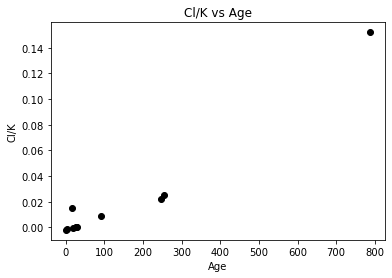

In [114]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

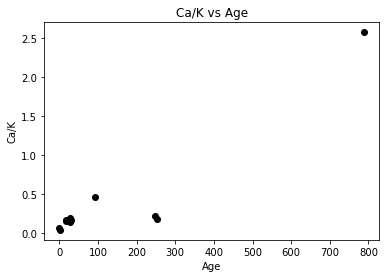

In [115]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

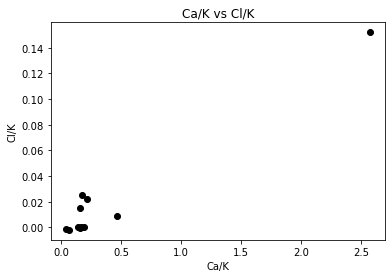

In [116]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

Text(0, 0.5, '36Ar/39Ar')

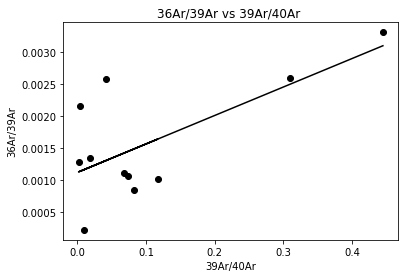

In [117]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [118]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = -0.25028438836362504
y_intercept = 0.001118239728131207
slope = 0.0044678764642186765


Crea Spectrum Age plot 

In [119]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()
cumulative_df = pd.DataFrame(cumulative)

# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])

# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])

# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns

# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})

# Cancella l'ultima riga di (Cum%39)
print(double_cumulative_df.index[-1])
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=double_cumulative_df.index[-1]))

# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index

# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns

# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns

# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

21


,Cum%39,Age+2error,Age-2error
0,0.000000,16.943770,15.654021
1,4.787957,16.943770,15.654021
2,4.787957,254.762787,252.231002
3,8.995052,254.762787,252.231002
4,8.995052,252.780433,242.075893
5,12.198842,252.780433,242.075893
6,12.198842,29.607720,29.179420
7,16.700140,29.607720,29.179420
8,16.700140,27.659480,27.228593
9,20.394267,27.659480,27.228593


Text(0, 0.5, 'Apparent Age (Ma)')

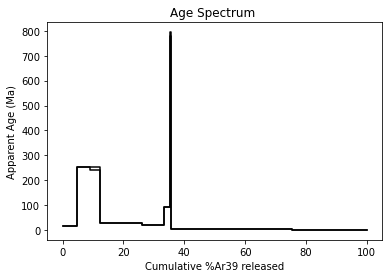

In [120]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error',color = 'black')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error', color = 'black')
plt.title('Age Spectrum ')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age (Ma)')


# PLOT 'gainF/IC0 vs 40Ar F' and 'gainIC0/IC1 vs gainF/IC0'¶

Text(0, 0.5, 'gainF/IC0')

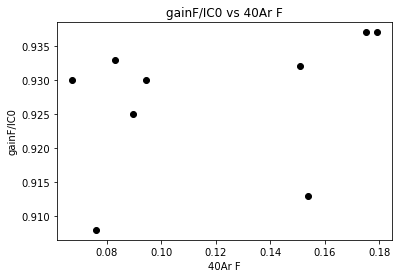

In [609]:
# Crea 'gainF/IC0 vs 40Ar F'
plt.scatter(df_data['40Ar F'],df_data['gainF/IC0'],marker= 'o', color = 'black' )
plt.title('gainF/IC0 vs 40Ar F')
plt.xlabel('40Ar F')
plt.ylabel('gainF/IC0')

Text(0, 0.5, 'gainIC0/IC1')

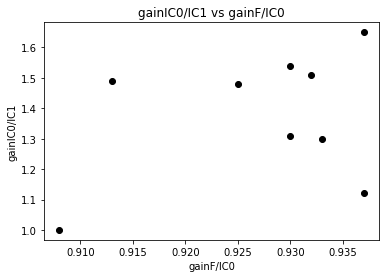

In [268]:
# Crea 'gainIC0/IC1 vs gainF/IC0'
plt.scatter(df_data['gainF/IC0'],df_data['gainIC0/IC1'],marker= 'o', color = 'black' )
plt.title('gainIC0/IC1 vs gainF/IC0')
plt.xlabel('gainF/IC0')
plt.ylabel('gainIC0/IC1')